FIAP - Machine Learning & Modelling

# Aula 06 - Regressão Linear

Vamos passar pelo pipeline de ciência de dados, implementando os passos em python e realizando uma Regressão Linear como modelo preditivo.

## Pipeline de ciência de dados

Relembrando as etapas do processo de ciência de dados:

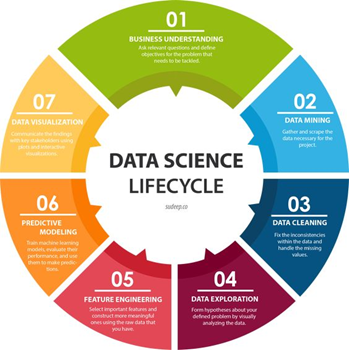

### Entendimento do problema

É possível prever a altura dos filhos baseado nas alturas dos pais? 


### Obtenção dos dados 

Este conjunto de dados lista as observações individuais de 934 crianças em 205 famílias nas quais Galton (1886) baseou sua tabulação cruzada, mostrando a relação entre as alturas dos pais e de seus filhos. 

Dados baixados [deste link](https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/galton.csv)

Dicionário de dados retirado [daqui](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/GaltonFamilies.html)

Os dados são: 
							
- `family`: ID de família, um fator com níveis 001-204
- `father`: altura do pai
- `mother`: altura da mãe
- `midparentHeight`: altura parental média, calculada como (pai + 1,08 * mãe) / 2
- `children`: número de filhos nesta família
- `childNum`: número desta criança dentro da família. As crianças são listadas em ordem decrescente de altura para meninos, seguidos por meninas
- `gender`: gênero infantil, fator com níveis feminino e masculino
- `childHeight`: altura da criança

**OBSERVAÇÃO**: os dados das alturas estão em `inches`. Para transformar em `cm`, podemos usar a fórmula: "1 inch =
2.54 centimeters"

In [23]:
# Imports necessários 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
df = pd.read_csv('datasets/galton.csv')
df.head(5)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [43]:
# Quantos dados?
df.shape

(934, 8)

In [44]:
# Quais os tipos? Dados faltantes? 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family           934 non-null    object 
 1   father           934 non-null    float64
 2   mother           934 non-null    float64
 3   midparentHeight  934 non-null    float64
 4   children         934 non-null    int64  
 5   childNum         934 non-null    int64  
 6   gender           934 non-null    object 
 7   childHeight      934 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 58.5+ KB


In [45]:
# Alguma info estatística útil? 
df.describe()

,father,mother,midparentHeight,children,childNum,childHeight
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,69.197109,64.089293,69.206773,6.171306,3.585653,66.745931
std,2.476479,2.290886,1.802370,2.729025,2.361410,3.579251
min,62.000000,58.000000,64.400000,1.000000,1.000000,56.000000
25%,68.000000,63.000000,68.140000,4.000000,2.000000,64.000000
50%,69.000000,64.000000,69.248000,6.000000,3.000000,66.500000
75%,71.000000,65.875000,70.140000,8.000000,5.000000,69.700000
max,78.500000,70.500000,75.430000,15.000000,15.000000,79.000000


In [46]:
# Quantos valores únicos por coluna?
df.nunique()

family             205
father              35
mother              29
midparentHeight    140
children            12
childNum            15
gender               2
childHeight         67
dtype: int64

### Limpeza dos dados

In [47]:
# Removendo duplicatas
df.drop_duplicates(inplace=True)

In [48]:
# Removendo dados faltantes
df.dropna(inplace=True)

In [49]:
df.shape

(934, 8)

Vamos trabalhar com dados em **m**? Não somos obrigados. 

In [50]:
def inch_to_meter(inch):
    return inch*2.54/100

In [51]:
inch_to_meter(78.5)

1.9939000000000002

Agora faça o mesmo para as demais colunas de alturas!

In [52]:
colunas = ["father", "mother", "midparentHeight", "childHeight"]
for coluna in colunas:
    df[coluna] = df[coluna].apply(inch_to_meter)

In [53]:
df.head(5)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,1.9939,1.7018,1.915922,4,1,male,1.85928
1,1,1.9939,1.7018,1.915922,4,2,female,1.75768
2,1,1.9939,1.7018,1.915922,4,3,female,1.75260
3,1,1.9939,1.7018,1.915922,4,4,female,1.75260
4,2,1.9177,1.6891,1.870964,4,1,male,1.86690


Sabemos que os modelos só trabalham com números, então não podemos deixar a coluna `gender` como está! Precisamos transformá-la!

In [54]:
def sex(x):
    return 0 if x == "male" else 1

In [55]:
df["gender"] = df["gender"].apply(sex)

In [56]:
# Remmovendo colunas que não serão úteis
df.drop(columns=["family", "childNum", "children"], inplace=True)

### Modelagem

In [57]:
# Separação de DADOS e LABEL
X = df.drop(columns=["childHeight"])
Y = df["childHeight"]

In [69]:
# Dividindo dados para TREINO e TESTE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [70]:
# Treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

LinearRegression()

In [71]:
# Fazendo as predições
Y_pred = modelo.predict(X_test)

In [86]:
Y_pred[0:5]

array([1.75975637, 1.77538137, 1.77928762, 1.64647512, 1.78124075])

### Avaliação

In [87]:
# Erro quadrático médio
mean_squared_error(Y_test, Y_pred)

0.0030422383868368716

In [88]:
# Erro absoluto médio
mean_absolute_error(Y_test, Y_pred)

0.04377959609664946

In [89]:
# R²
r2_score(Y_test, Y_pred)

0.6203906068544127

### Interpretando os coeficientes encontrados!

Vamos dar uma olhada nos coeficientes encontrados para cada característica:

In [65]:
modelo.intercept_

0.5214751239471669

In [66]:
modelo.coef_

array([-6.44185758e+12, -6.95720618e+12,  1.28837152e+13, -1.35742188e-01])

In [67]:
X_train.columns

Index(['father', 'mother', 'midparentHeight', 'gender'], dtype='object')

In [90]:
pd.DataFrame({
    "features": X_train.columns,
    "coef": modelo.coef_
}).sort_values(by="coef", ascending=False)

,features,coef
2,midparentHeight,1.288372e+13
3,gender,-1.357422e-01
0,father,-6.441858e+12
1,mother,-6.957206e+12
